# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
from os.path import abspath

# load the pickled data
training_file = abspath("training_data/train.p")
testing_file = abspath("training_data/test.p")

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import numpy as np

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Class: 0


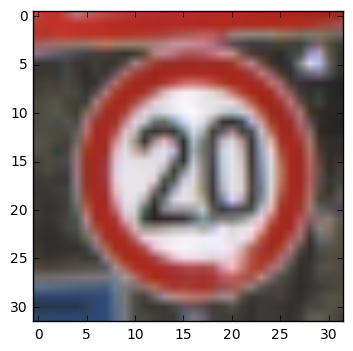

Class: 1


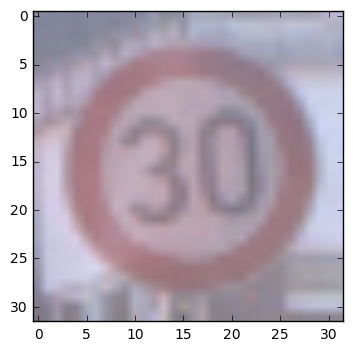

Class: 2


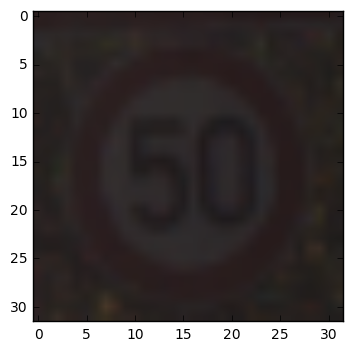

Class: 3


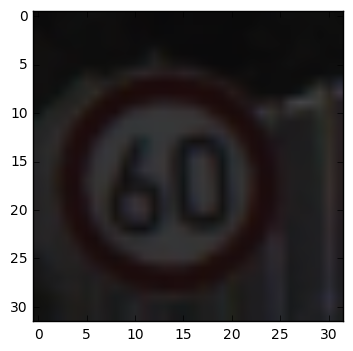

Class: 4


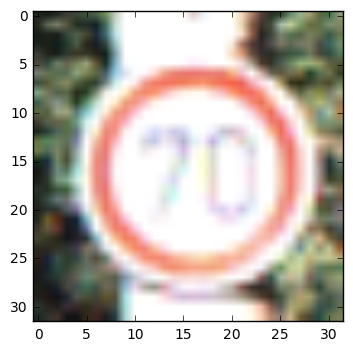

Class: 5


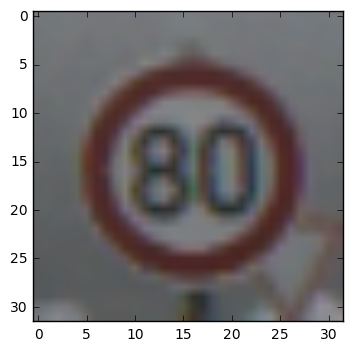

Class: 6


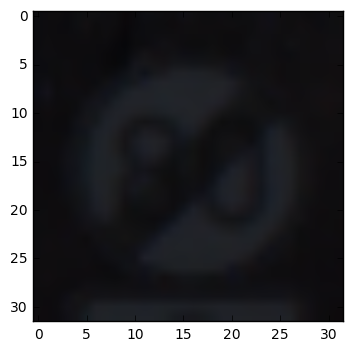

Class: 7


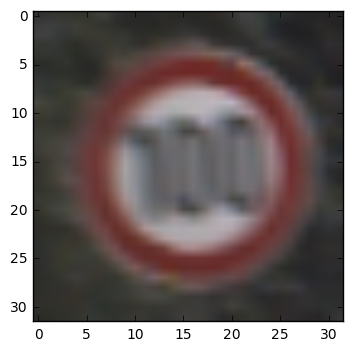

Class: 8


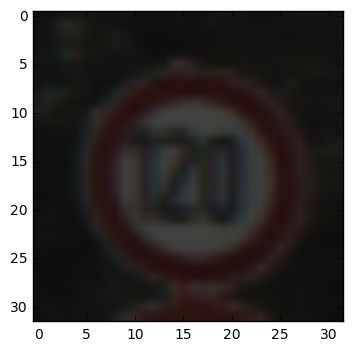

Class: 9


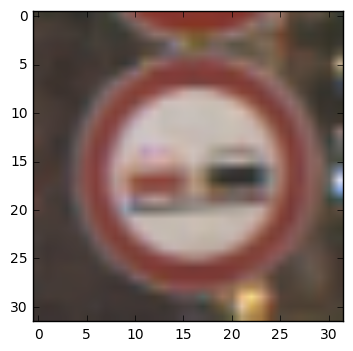

Class: 10


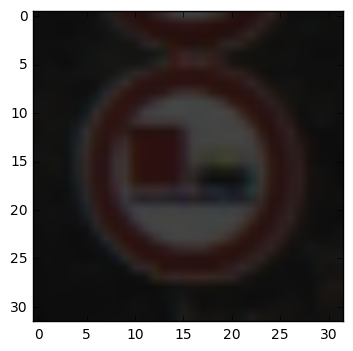

Class: 11


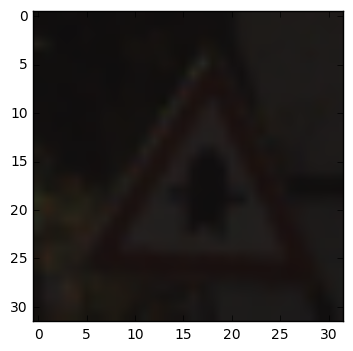

Class: 12


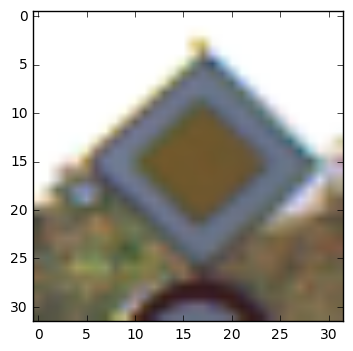

Class: 13


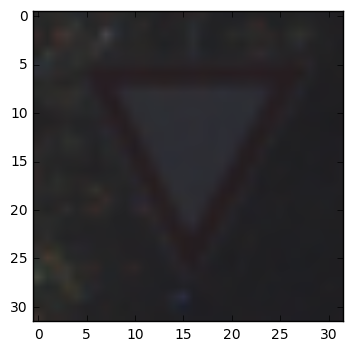

Class: 14


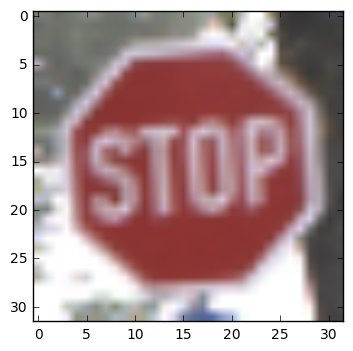

Class: 15


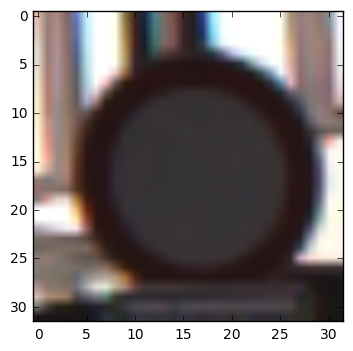

Class: 16


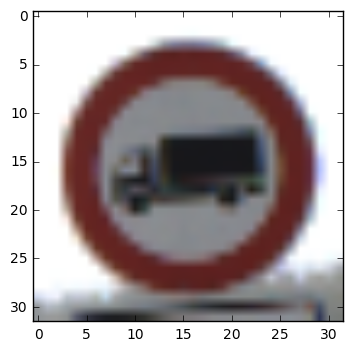

Class: 17


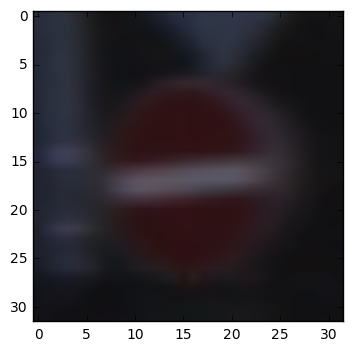

Class: 18


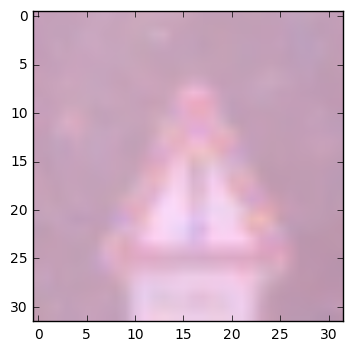

Class: 19


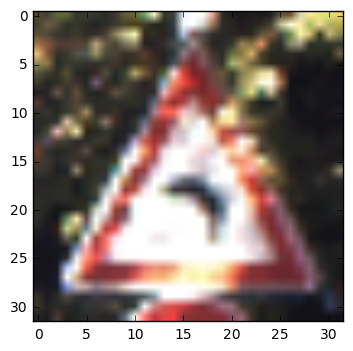

Class: 20


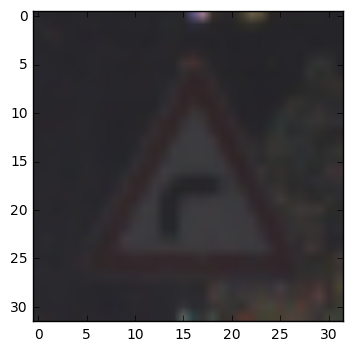

Class: 21


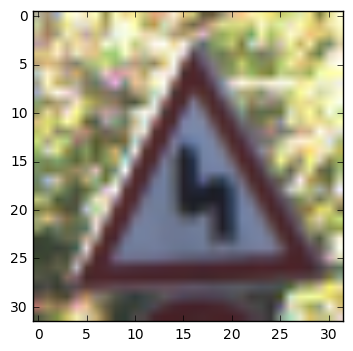

Class: 22


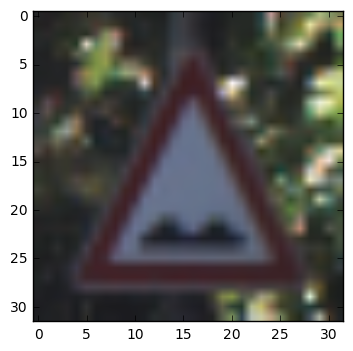

Class: 23


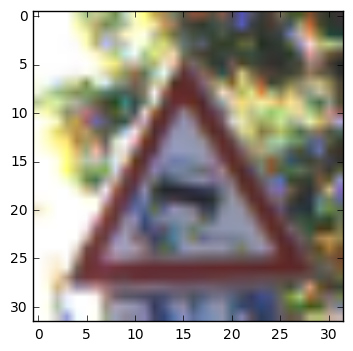

Class: 24


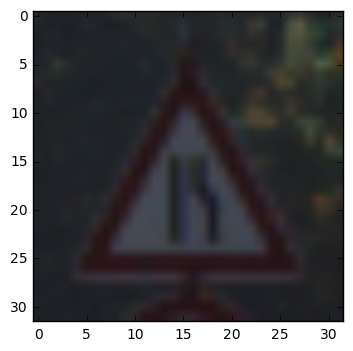

Class: 25


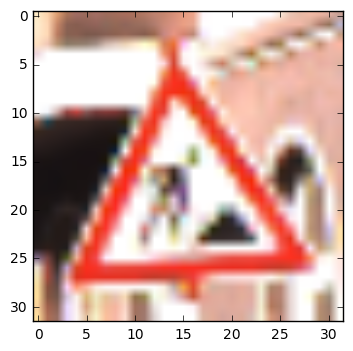

Class: 26


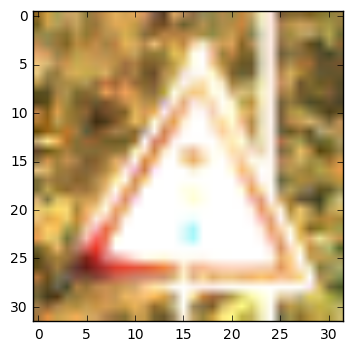

Class: 27


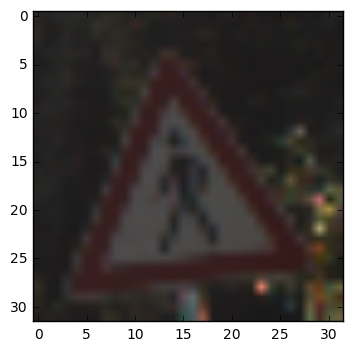

Class: 28


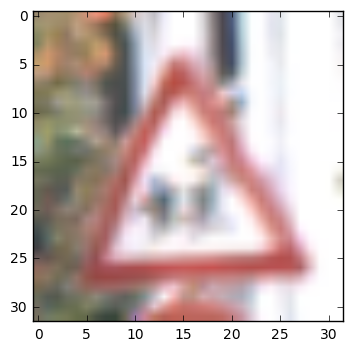

Class: 29


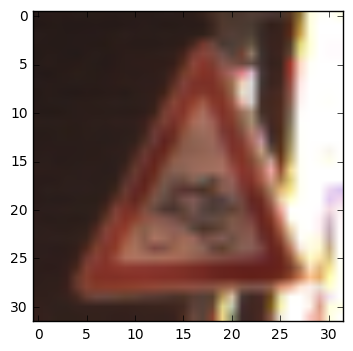

Class: 30


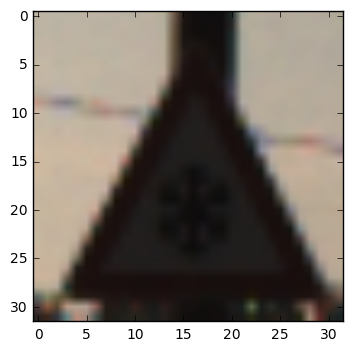

Class: 31


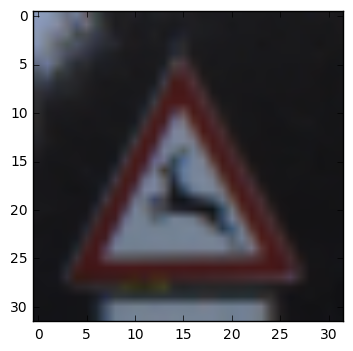

Class: 32


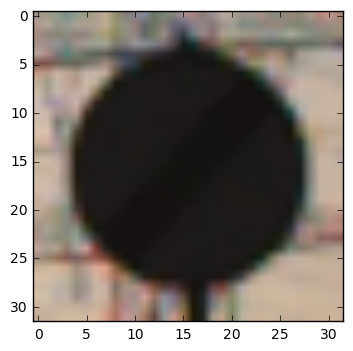

Class: 33


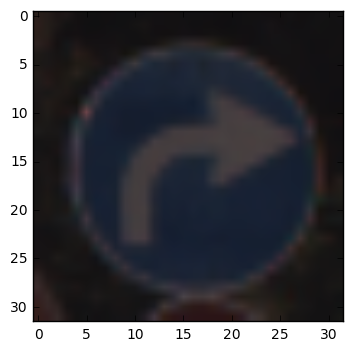

Class: 34


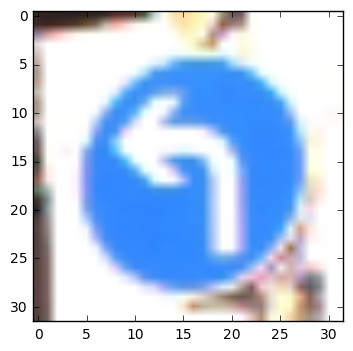

Class: 35


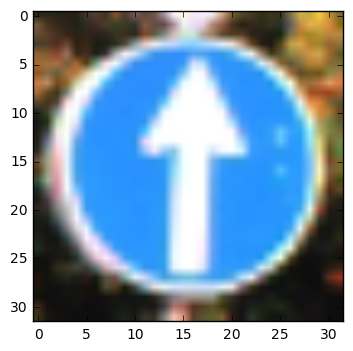

Class: 36


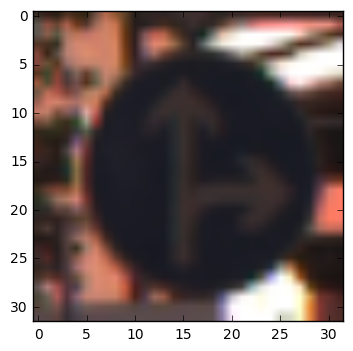

Class: 37


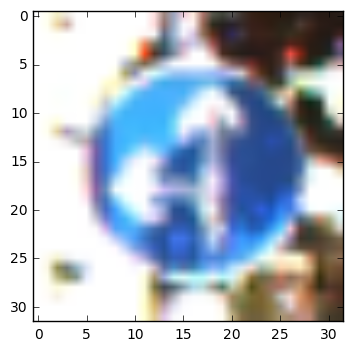

Class: 38


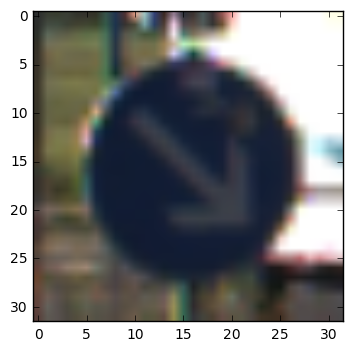

Class: 39


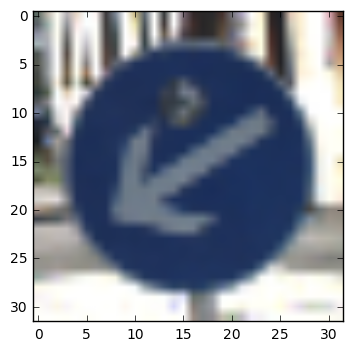

Class: 40


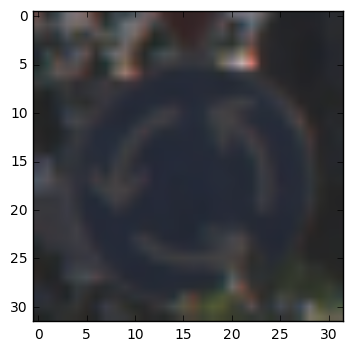

Class: 41


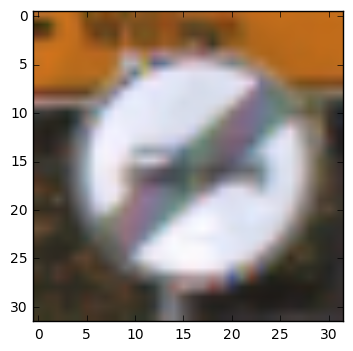

Class: 42


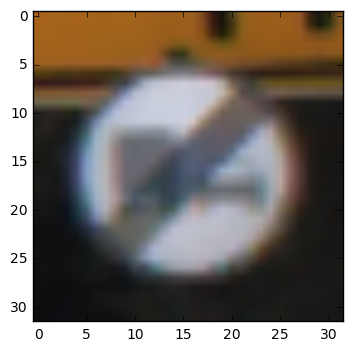

In [4]:
# Visualising the dataset with images for each class
import matplotlib.pyplot as plt
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline
for i in range(n_classes):
    print("Class:",i)
    plt.imshow(X_train[np.argwhere(y_train==i)[20][0]])
    plt.show()

In [5]:
# display the class names with string describing the class
# Read the signames csv file
signs_file = "./signnames.csv"
df = pd.read_csv(signs_file)
print("CLASSES AND NAMES")
print("_"*116 + "\n")
print(df)
print("_"*116 + "\n")

CLASSES AND NAMES
____________________________________________________________________________________________________________________

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                  

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
import cv2

# feature pre-processing, convert to color channels of 'interest'
def imgConv(img):
    blue = img[:,:,0]
    red = img[:,:,2]
    # gray_image channel was replaced with CLAHE, that gave better results
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray
    
    claheObj = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
    clahe = claheObj.apply(gray_image)
    stacked = np.stack((blue,red,clahe),axis=2)
    return stacked

#label conversion to one hot encoding
def oneHot(label):
    vec = np.zeros((n_classes),dtype=np.uint8)
    vec[label]=1
    return vec

# Get channels: Blue, Red, CLAHE
# CLAHE (Contrast-limited Adaptive Histogram Equalization)
# This gives 3 channels
conv_X_train = np.zeros((len(X_train), 32, 32, 3),dtype=np.uint8)
conv_X_test = np.zeros((len(X_test), 32, 32, 3),dtype=np.uint8)
for i in range(len(X_train)):
    conv_X_train[i,:,:,:] = imgConv(X_train[i,:,:,:])
for i in range(len(X_test)):
    conv_X_test[i,:,:,:] = imgConv(X_test[i,:,:,:])
print (conv_X_train.shape)
print (conv_X_test.shape)
# Convert labels
conv_y_train = np.zeros((len(y_train), n_classes),dtype=np.uint8)
conv_y_test = np.zeros((len(y_test), n_classes),dtype=np.uint8)
for i in range(len(y_train)):
    conv_y_train[i,:] = oneHot(y_train[i])
for i in range(len(y_test)):
    conv_y_test[i,:] = oneHot(y_test[i])

(39209, 32, 32, 3)
(12630, 32, 32, 3)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The idea of pre processing here is to get the features, main logic is as below:
covert the images to get the required colour channels
* Blue
* Red 
* CLAHE - improved grayscale (based on http://people.idsia.ch/~juergen/ijcnn2011.pdf)).
(As the signs have blue for information and red colour for resctrictions in the sign boards)

_Green channel is not used as there is no green colour in the signs_


features are normalised and class id's are converted to One Encoded values, As it would be easier for the model to predcit the output

In [7]:
#Data Process happens here
# generators are implemented which yields the data and also splits the data into testing and validation
from sklearn.model_selection import train_test_split

# First sort randomly data and labels
def newRandomTestValidationSplit(X, y):
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_tr, X_val, y_tr, y_val

# batch generator
def batches(X, y, batch_size): 
    n = int((len(X) / batch_size)+1)
    for i in range(n):
        start = i * batch_size
        end = start + batch_size
        yield (i, X[start:end], y[start:end])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Data is split so that 80% forms the training data and 20% forms the validation data
randomization and split are done for each epoch.

In [8]:
### Model Architecture

### Feel free to use as many code cells as needed.
# From (https://www.tensorflow.org/tutorials/mnist/pros/)
# Function to initialize wights
# "initialize weights with a small amount of noise for symmetry breaking, and to prevent 0 gradients"
import tensorflow as tf

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
# For ReLU neurons, it is also good practice to initialize them
# with a slightly positive initial bias to avoid "dead neurons"
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

num_logits = 43

def modVGG(x, keep_prob):
    x_image = tf.reshape(x, [-1,32,32,3])
    # Convolution 0 set x3, 1x1 conv, for TF to decide best colors
    Wconv0_1 = weight_variable([1, 1, 3, 3])
    bconv0_1 = bias_variable([3])
    conv0_1 = tf.nn.conv2d(x_image, Wconv0_1, strides=[1, 1, 1, 1], padding='SAME')
    conv0_1b = tf.nn.bias_add(conv0_1, bconv0_1)
    conv0_1r = tf.nn.relu(conv0_1b)
    
    # Convolution 1 set x3
    Wconv1_1 = weight_variable([3, 3, 3, 32])
    bconv1_1 = bias_variable([32])
    conv1_1 = tf.nn.conv2d(conv0_1r, Wconv1_1, strides=[1, 1, 1, 1], padding='SAME')
    conv1_1b = tf.nn.bias_add(conv1_1, bconv1_1)
    conv1_1r = tf.nn.relu(conv1_1b)
    
    Wconv1_2 = weight_variable([3, 3, 32, 32])
    bconv1_2 = bias_variable([32])
    conv1_2 = tf.nn.conv2d(conv1_1r, Wconv1_2, strides=[1, 1, 1, 1], padding='SAME')
    conv1_2b = tf.nn.bias_add(conv1_2, bconv1_2)
    conv1_2r = tf.nn.relu(conv1_2b)
    
    Wconv1_3 = weight_variable([3, 3, 32, 32])
    bconv1_3 = bias_variable([32])
    conv1_3 = tf.nn.conv2d(conv1_2r, Wconv1_3, strides=[1, 1, 1, 1], padding='SAME')
    conv1_3b = tf.nn.bias_add(conv1_3, bconv1_3)
    conv1_3r = tf.nn.relu(conv1_3b)
    
    pool1 = tf.nn.max_pool(conv1_3r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    drop1 = tf.nn.dropout(pool1, keep_prob)
    
    # Convolution 2 set x3
    Wconv2_1 = weight_variable([3, 3, 32, 64])
    bconv2_1 = bias_variable([64])
    conv2_1 = tf.nn.conv2d(drop1, Wconv2_1, strides=[1, 1, 1, 1], padding='SAME')
    conv2_1b = tf.nn.bias_add(conv2_1, bconv2_1)
    conv2_1r = tf.nn.relu(conv2_1b)
    
    Wconv2_2 = weight_variable([3, 3, 64, 64])
    bconv2_2 = bias_variable([64])
    conv2_2 = tf.nn.conv2d(conv2_1r, Wconv2_2, strides=[1, 1, 1, 1], padding='SAME')
    conv2_2b = tf.nn.bias_add(conv2_2, bconv2_2)
    conv2_2r = tf.nn.relu(conv2_2b)
    
    Wconv2_3 = weight_variable([3, 3, 64, 64])
    bconv2_3 = bias_variable([64])
    conv2_3 = tf.nn.conv2d(conv2_2r, Wconv2_3, strides=[1, 1, 1, 1], padding='SAME')
    conv2_3b = tf.nn.bias_add(conv2_3, bconv2_3)
    conv2_3r = tf.nn.relu(conv2_3b)
    
    pool2 = tf.nn.max_pool(conv2_3r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    drop2 = tf.nn.dropout(pool2, keep_prob)
    
    # result is 16x16x32; 8x8x64
    # Connected layer 1
    fc1_flat = tf.reshape(drop1, [-1, 16*16*32]) #8192
    fc2_flat = tf.reshape(drop2, [-1, 8*8*64])   #4096
    
    fc_flat = tf.concat(1, [fc1_flat, fc2_flat])
    
    Wfc1 = weight_variable([12288, 512])
    bfc1 = bias_variable([512])
    fc1 = tf.nn.bias_add(tf.matmul(fc_flat, Wfc1), bfc1)
    relu1 = tf.nn.relu(fc1)
    dropfc1 = tf.nn.dropout(relu1, keep_prob)
    
    # Connected layer 2
    Wfc2 = weight_variable([512, 43])
    bfc2 = bias_variable([43])
    y_conv = tf.nn.bias_add(tf.matmul(dropfc1, Wfc2), bfc2)
    return y_conv

# Inputs: x, y_, keep_prob 
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y_ = tf.placeholder(tf.float32, shape=[None, num_logits])

# Normalize inputs with values from 0-255 to -1.0 to 1.0
x_norm = tf.div(tf.sub(x, 127),255)

y_conv = modVGG(x_norm, keep_prob)
# Define loss and optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# Calculate accuracy
softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(y_conv, y_)
softmax = tf.nn.softmax(y_conv)
prediction = tf.argmax(y_conv,1)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Tested on multiple architectures and finally decided to go with VGG as it is giving promising results with (red, blue, CLACHE grey channels).
The accuracy obtained here is with around 200 epochs.

/// update the accuracy and epochs

used the following architecture (derived from VGG):<br />
1: 1x1 convolution (+relu) in order for TF to calculate which channel to use<br />
2: 3x3 convolution (+relu) with 32 outputs<br />
3: 3x3 convolution (+relu) with 32 outputs<br />
4: 3x3 convolution (+relu) with 32 outputs<br />
5: 2x2 MaxPool (with stride 2) that reduces the image size to 16x16<br />
6: Dropout (0.5 during training, 1.0 during validation / testing)<br />
7: 3x3 convolution (+relu) with 64 outputs<br />
8: 3x3 convolution (+relu) with 64 outputs<br />
9: 3x3 convolution (+relu) with 64 outputs<br />
10: 2x2 MaxPool (with stride 2) that reduces the image size to 8x8<br />
11: Dropout (0.5 during training, 1.0 during validation / testing)<br />
12: Fully connected layer (+relu) with flattened inputs from step 6 and 11 with 12288 inputs and 512 outputs<br />
13: Dropout (0.5 during training, 1.0 during validation / testing)<br />
14: Fully connected layer (+relu) with 512 inputs and 43 (class) outputs<br />

In [13]:
# Training 

### Feel free to use as many code cells as needed.
import tensorflow as tf

# save the model after training with this name (As it can be used later fro re training or for evaluation)
save_file = 'signalPredictModel.ckpt'
saver = tf.train.Saver()

num_epochs = 300
with tf.Session() as sess:
    # Initialize all the Variables
    sess.run(tf.initialize_all_variables())
    print('Variables initialized.')
    for epoch in range(num_epochs):
        X_tr, X_val, y_tr, y_val = newRandomTestValidationSplit(conv_X_train, conv_y_train)
        print('epoch',epoch)
        for (k, X_k, y_k) in batches(X_tr, y_tr, 128):
            sess.run(train_step,feed_dict={x: X_k, y_: y_k, keep_prob: 0.5})
        valid_accuracy = []
        for (l, X_v, y_v) in batches(X_val, y_val, 128):
            val_accuracy = sess.run(accuracy,feed_dict={x: X_v,y_: y_v, keep_prob: 1.0})
            valid_accuracy.append(val_accuracy)
        valid_accuracy = np.mean(valid_accuracy)
        print('Epoch {:<3} - Validation Accuracy: {}'.format(epoch,valid_accuracy))
        
        # save the model for every 10 epochs
        if (epoch%10 == 0):
            # Save the model
            saver.save(sess, save_file)
            print('Trained Model Saved.')
    saver.save(sess, save_file)
    print('Trained Model Saved.')

ValueError: At least two variables have the same name: beta1_power

In [9]:
# Validation Accuracy
import tensorflow as tf
loader = tf.train.Saver()

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('signalPredictModel.ckpt.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = []
    for (t, X_t, y_t) in batches(conv_X_test, conv_y_test, 128):
        tst_accuracy = sess.run(accuracy,feed_dict={x: X_t,y_: y_t, keep_prob: 1.0})
        test_accuracy.append(tst_accuracy)
    test_acc = np.mean(test_accuracy)
    print("Test Accuracy = {:.3f}".format(test_acc))

Test Accuracy = 0.970


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

**Adam optimizer** was chosen after experimenting with various optimizers. Also this has less number of hyperparameters to tune, therefore easy to tune the model<br />

**Batch size: **
128 - After experimenting with various values, 128 seems good fit for batch size

**Numer of Epochs: **
Trained for 300 epochs with model saved at every 10 epochs,
// update the results

**Hyperparameters: **
There are lot of prameters to tune, to get the desired output

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I have started to tackle the problem initially with Lenet model from class after trying with various models, the VVG (modified) version is giving promising results. Used the CLAHE image pre-processing approach from (http://people.idsia.ch/~juergen/ijcnn2011.pdf)

As the input images are of size (32x32 pixels) which means we dont need max pool layers and we need deeper network for better accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/home/sumanth/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(20, 32, 32, 3)
(20, 32, 32, 3)
(20, 43)


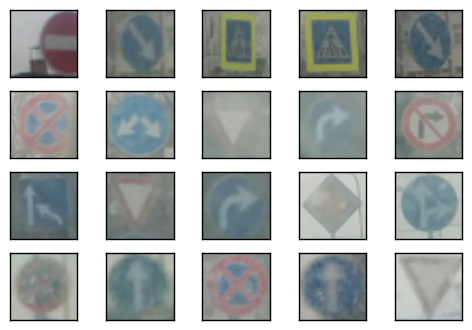

In [10]:
### Test images
### Feel free to use as many code cells as needed.

# Load 20 images from img folder with filenames t0.bmp - t19.bmp
# array my_images contains the loaded RGB images
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

my_images = np.zeros((20, 32, 32, 3),dtype=np.uint8)
fig = plt.figure()
for i in range(20):
    name = 'img/t'+str(i)+'.bmp'
    img = cv2.imread(name,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    my_images[i,:,:,:]=img
    sp = fig.add_subplot(4,5,i+1)
    sp.axes.get_xaxis().set_visible(False)
    sp.axes.get_yaxis().set_visible(False)
    sp.imshow(img)
fig.show()
print (my_images.shape)
conv_my_images = np.zeros((len(my_images), 32, 32, 3),dtype=np.uint8)
for i in range(len(my_images)):
    conv_my_images[i,:,:,:] = imgConv(my_images[i,:,:,:])
conv_my_labels = np.zeros((len(conv_my_images), n_classes),dtype=np.uint8)
print (conv_my_images.shape)
print (conv_my_labels.shape)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



/home/sumanth/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


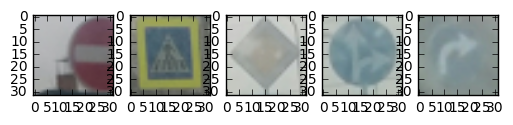

In [11]:
fig = plt.figure()
a=fig.add_subplot(1,5,1)
a.imshow(my_images[0,:,:,:])
b=fig.add_subplot(1,5,2)
b.imshow(my_images[3,:,:,:])
c=fig.add_subplot(1,5,3)
c.imshow(my_images[13,:,:,:])
d=fig.add_subplot(1,5,4)
d.imshow(my_images[14,:,:,:])
e=fig.add_subplot(1,5,5)
e.imshow(my_images[8,:,:,:])
fig.show()

**Answer:**
above 5 images are selected as these are noisy images.
1. ITs difficult to classify as only half sign is visible
2. additional yellow bounding makes might make it difficult.
3. very noisy and clutterd image
4. normal sign
5. blurred image sign

In [1]:
### Predict the signal here
### Feel free to use as many code cells as needed.
import tensorflow as tf
loader = tf.train.Saver()

with tf.Session() as sess:
    # load the saved model
    loader = tf.train.import_meta_graph('signalPredictModel.ckpt.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    softmax, softmaxce, logits, predictions = sess.run([softmax, softmax_cross_entropy, y_conv, prediction],feed_dict={x: conv_my_images,y_: conv_my_labels, keep_prob: 1.0})

print ('Predictions:')
print (predictions)
print ('Correct labels:')
print ('[17 38 NA NA 38 NA NA 13 33 NA NA 13 33 12 36 NA 35 NA 35 13]')
    

ValueError: No variables to save

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [17]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
plt.plot(softmax[0])
import tensorflow as tf
with tf.Session() as sess:
    topk = sess.run(tf.nn.top_k((tf.constant(softmax[0])), k=5))
print (topk)

ValueError: Shape (?, 43) must have rank 1

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.